In [12]:
from scipy.optimize import curve_fit 
from numpy import array, exp
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse # для написания греческих букв

fig = plt.figure()

#данные
x=[2956,2926,2860,2848,2820,2798,2790,2752,2745,2727,2715,2699,2679,2658,2647,2630,2618,2596,2574,2560,2529,2514,2250,2210,2202,2919,2687,2481,2470,2292,1868,1206,651]
y= [7032,6929,6717,6678,6599,6533,6507,6402,6383,6334,6305,6267,6217,6164,6143,6096,6074,6030,5976,5945,5882,5852,5401,5341,5331,6907,6234,5791,5770,5461,4916,4358,4047]
x_error= 1

def regress(M, N, x, x_n, t_n, lamda=0):
    print("-----------------------M=%d, N=%d-------------------------" %(M,N))
    order = np.arange(M+1)
    order = order[:, np.newaxis]
    e = np.tile(order, [1,N])
    XT = np.power(x_n, e)
    X = np.transpose(XT)
    a = np.matmul(XT, X) + lamda*np.identity(M+1) #X.T * X
    b = np.matmul(XT, t_n) #X.T * T
    w = np.linalg.solve(a,b) #aW = b => (X.T * X) * W = X.T * T
    print("W:")
    print(w)
    e2 = np.tile(order, [1,x.shape[0]])
    XT2 = np.power(x, e2)
    p = np.matmul(w, XT2)
    return p

p = regress(3, 33, x, x_10, t_10)

#построение графика
plt.plot(x,y,color = 'red', marker ='o',linestyle='None', markersize = 1) #точечный график
plt.plot(x, y_fit, color = 'red', linewidth = 1, label='Fe: -0.486x + 8.89') #апроксимирующая прямая
#plt.errorbar(x, y,xerr = x1_error,fmt='none',ecolor = 'black',elinewidth = 3)# полосы погрешностей


plt.xlabel("Theta, grad")
plt.ylabel("lambda, angstrem")
#plt.axis([0, 20.5, 3.3, 8.5])
#plt.legend() #легенда
plt.grid(True) 
plt.show()
fig.savefig('find_mu.png', dpi = 1000)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

<Figure size 432x288 with 0 Axes>

[ 1.31123589e-10 -7.20968654e-07  1.67818647e-03 -1.09987180e+00
  4.22778159e+03]


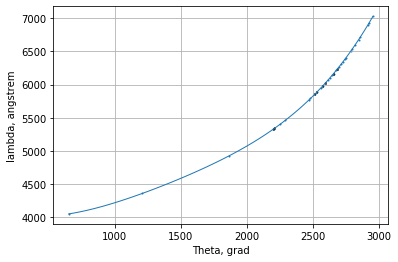

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

fig = plt.figure()

fi=[2956,2926,2860,2848,2820,2798,2790,2752,2745,2727,2715,2699,2679,2658,2647,2630,2618,2596,2574,2560,2529,2514,2250,2210,2202,2919,2687,2481,2470,2292,1868,1206,651]
Lambda= [7032,6929,6717,6678,6599,6533,6507,6402,6383,6334,6305,6267,6217,6164,6143,6096,6074,6030,5976,5945,5882,5852,5401,5341,5331,6907,6234,5791,5770,5461,4916,4358,4047]
fi_error= 1

z = np.polyfit(fi, Lambda, 4)
f = np.poly1d(z)
f_new = np.linspace(fi[0], fi[-1], 100)
l_new = f(f_new)

print(f.c) 

plt.xlabel("Theta, grad")
plt.ylabel("lambda, angstrem")
plt.scatter(fi, Lambda, s = 1)
plt.plot(f_new, l_new, linewidth = 1)
plt.grid(True) 
plt.errorbar(fi, Lambda,xerr = fi_error,fmt='none',ecolor = 'black',elinewidth = 3)

fig.savefig('grad.png', dpi = 1000)